In [6]:
import tensorflow as tf
print(tf.test.gpu_device_name())
print(tf.config.list_physical_devices())

/device:GPU:0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/KnightChaser/ML-challenge/main/EX_challenging_problems/04_salary_expectation/Salary_Data.csv")
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<ipython-input-9-8685fe9497d1>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df["YearsExperience"], y = df["Salary"], palette='coolwarm')        # I just wanted to use Seaborn this time


<Axes: xlabel='YearsExperience', ylabel='Salary'>

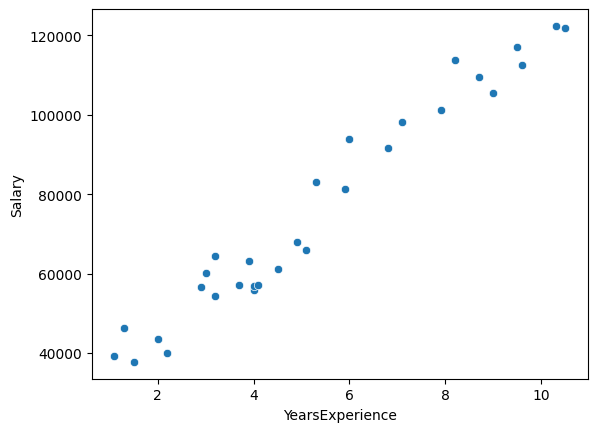

In [9]:
import seaborn as sns

sns.scatterplot(x = df["YearsExperience"], y = df["Salary"], palette='coolwarm')        # I just wanted to use Seaborn this time

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(df["YearsExperience"], df["Salary"], test_size = 0.15)

In [11]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(25,)
(25,)
(5,)
(5,)


In [12]:
from tensorflow import keras

def create_DNN_model(additional_layers = None):

    model = keras.Sequential()

    if additional_layers:
        for more_layer in additional_layers:
            model.add(more_layer)

    model.add(keras.layers.Dense(units = 1))

    return model

In [26]:
model = create_DNN_model([keras.layers.Dense(units = 32, activation = "softmax", input_shape = (1, )),
                          keras.layers.Dense(units = 16, activation = "relu")
                        ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                64        
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [27]:

from tensorflow._api.v2.config import optimizer
model.compile(loss = "mse",                         # <-- REGRESSION
              metrics = "mae",
              optimizer = "adam")

In [31]:

from sklearn.utils import validation
import tensorflow as tf

# early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True, mode = "auto")

history = model.fit(train_input, train_target,
                    epochs = 20,
                    steps_per_epoch = 3,
                    validation_data = (test_input, test_target))

Epoch 1/20
3/3 [==============================] - 0s 53ms/step - loss: 7106308096.0000 - mae: 79488.3281 - val_loss: 3467010560.0000 - val_mae: 58451.6484
Epoch 2/20
3/3 [==============================] - 0s 24ms/step - loss: 7106286080.0000 - mae: 79488.1719 - val_loss: 3466993664.0000 - val_mae: 58451.5000
Epoch 3/20
3/3 [==============================] - 0s 29ms/step - loss: 7106262528.0000 - mae: 79488.0234 - val_loss: 3466976512.0000 - val_mae: 58451.3516
Epoch 4/20
3/3 [==============================] - 0s 28ms/step - loss: 7106238976.0000 - mae: 79487.8828 - val_loss: 3466959360.0000 - val_mae: 58451.2109
Epoch 5/20
3/3 [==============================] - 0s 27ms/step - loss: 7106215424.0000 - mae: 79487.7422 - val_loss: 3466941696.0000 - val_mae: 58451.0625
Epoch 6/20
3/3 [==============================] - 0s 29ms/step - loss: 7106192384.0000 - mae: 79487.5859 - val_loss: 3466924800.0000 - val_mae: 58450.9141
Epoch 7/20
3/3 [==============================] - 0s 26ms/step - loss:

In [25]:
## The given data amount is too small!